In [2]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc
!pip install qiskit_ibm_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=72208526df5701697422a3f50a2984b2fcadd63106d5c5ae68b9c081c75f95a3
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

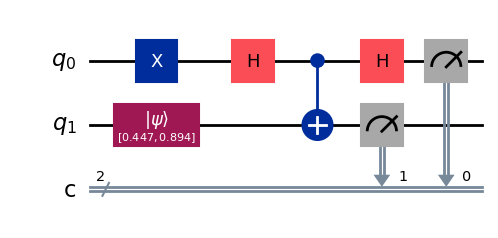

In [3]:
from qiskit import QuantumCircuit
from qiskit import quantum_info as qi
import numpy as np
qc =  QuantumCircuit(2,2)

sv = qi.Statevector([np.sqrt(0.2),np.sqrt(0.8)])
qc.initialize(sv,1)
qc.x(0)
qc.h(0)
qc.cx(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.draw('mpl')

In [4]:
# PUBs on aer Simulator
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2
from qiskit_aer import AerSimulator

aer_simulator = AerSimulator()

sampler_aer = SamplerV2(mode = aer_simulator)

qc_tr = transpile(qc, backend = aer_simulator)

job_aer = sampler_aer.run([(qc_tr,None,100),(qc_tr,None,1000)]) #PUB = (circuit, paramters, shots)

In [5]:
results_aer = job_aer.result()
counts_100 = results_aer[0].data.c.get_counts()

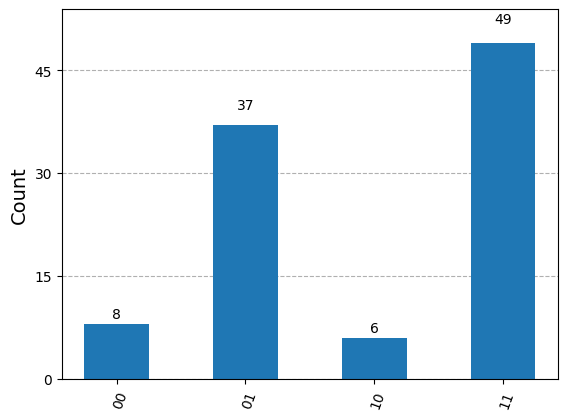

In [6]:
from qiskit.visualization import plot_histogram, plot_distribution

plot_histogram(counts_100)

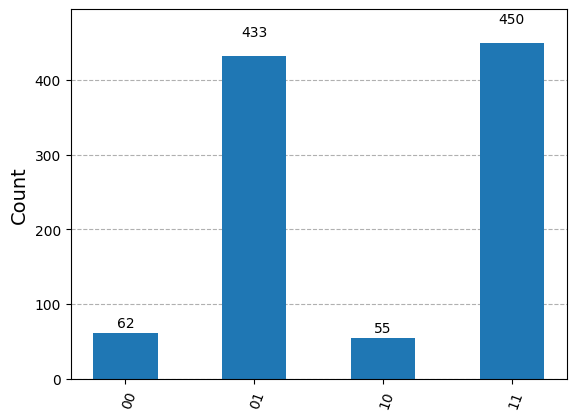

In [7]:
counts_1000 = results_aer[1].data.c.get_counts()
plot_histogram(counts_1000)

In [8]:
# PUBs on IBM quantum computers
from qiskit_ibm_runtime import SamplerV2, QiskitRuntimeService

ibm_service = QiskitRuntimeService(channel = "ibm_quantum", token = "24e5154ab79676e9f0831672423f800ef35f3781e632f6db41474fb97bb0749bfb78959312e5245baea0d71754cc64da1d3889143285a0ffc4586ea81ba5cc06")

In [9]:
ibm_qcomp = ibm_service.backend("ibm_kyiv")
sampler_ibm = SamplerV2(mode=ibm_qcomp)

In [10]:
qc_tr_ibm = transpile(qc, backend = ibm_qcomp)

job_ibm = sampler_ibm.run([(qc_tr_ibm,None,100),(qc_tr_ibm,None,1000)]) #PUB = (circuit, paramters, shots)


In [15]:
print(job_ibm.job_id())

cypcxdd26abg008e7s70


In [16]:
job_id = "cypcxdd26abg008e7s70"
job_ibm = ibm_service.job(job_id)

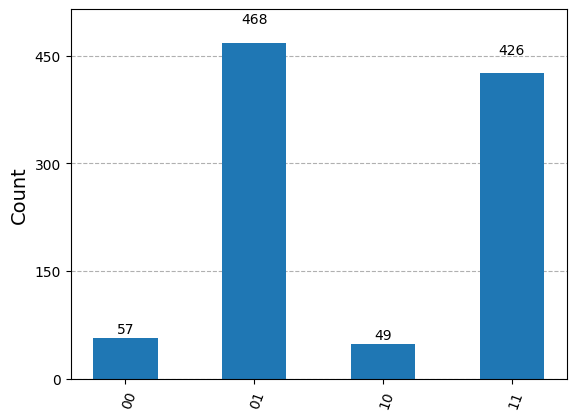

In [17]:
results_ibm = job_ibm.result()
counts_ibm = results_ibm[1].data.c.get_counts()
plot_histogram(counts_ibm)

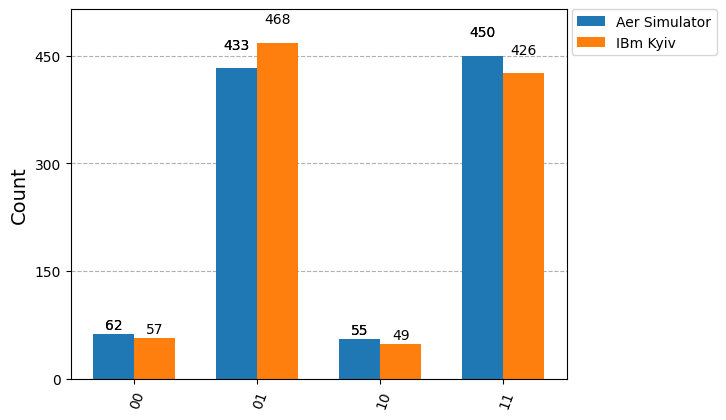

In [18]:
plot_histogram([counts_1000,counts_ibm], legend = ["Aer Simulator", "IBm Kyiv"])

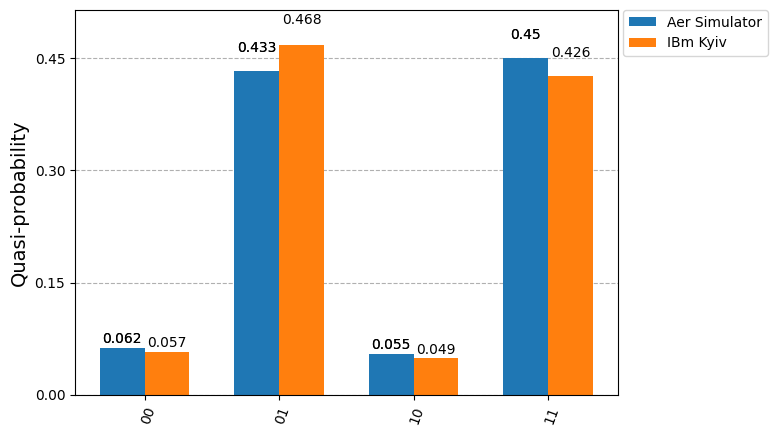

In [19]:
plot_distribution([counts_1000,counts_ibm], legend = ["Aer Simulator", "IBm Kyiv"])